Польшакова Валерия, ПИН-б-з-19-1

Скачичваем набор данных Cars

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
df = pd.read_csv("https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_no_dup.csv", delimiter = ',')
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0


Используем функции и методы библиотеки Pandas
для загрузки и начальной работы с данными

In [ ]:
df.duplicated().sum()

0

In [ ]:
DF = df.drop_duplicates().reset_index(drop=True)
DF.to_csv("https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_no_dup.csv",index=False)
DF.sort_values(by = 'Year', ascending= False)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
29164,Audi,A5,2021,Sedan,661.0,2000.0,Petrol,Automatic,32200.0
32583,Mercedes,GLS Klass,2021,SUV,0.0,3000.0,Diesel,Automatic,107528.0
15611,Volkswagen,Polo,2021,Universal,280000.0,1400.0,Petrol,Manual,1900.0
6044,Skoda,Superb,2021,Sedan,0.0,1500.0,Petrol,Automatic,30000.0
11840,Toyota,Corolla,2021,Universal,288.0,1987.0,Hybrid,Automatic,23000.0
...,...,...,...,...,...,...,...,...,...
22488,Audi,80,1900,Sedan,0.0,1000.0,Petrol,Manual,1500.0
37134,Mazda,323,1900,Sedan,145000.0,1800.0,Petrol,Manual,1450.0
27647,Vaz,2108,1900,Universal,57885658.0,889.0,Petrol,Manual,3500.0
36443,Toyota,Carina,1900,Sedan,2200.0,1800.0,Petrol,Manual,1600.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37264 non-null  object 
 1   Model                 37264 non-null  object 
 2   Year                  37264 non-null  int64  
 3   Style                 37264 non-null  object 
 4   Distance              37264 non-null  float64
 5   Engine_capacity(cm3)  37264 non-null  float64
 6   Fuel_type             37264 non-null  object 
 7   Transmission          37264 non-null  object 
 8   Price(euro)           37264 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


In [19]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
count,32896.000000,3.289600e+04,32896.000000,3.289600e+04,32896.000000,32896.000000
mean,2008.213856,1.827076e+05,1865.141263,9.944527e+03,13.786144,14881.028619
std,7.711926,1.058771e+05,701.831409,5.611232e+04,7.711926,7434.221091
min,1900.000000,1.000000e+02,0.000000,1.000000e+00,1.000000,100.000000
25%,2004.000000,1.214920e+05,1499.000000,3.599000e+03,8.000000,10100.976190
50%,2010.000000,1.800000e+05,1800.000000,6.799000e+03,12.000000,14400.000000
75%,2014.000000,2.360000e+05,2000.000000,1.220000e+04,18.000000,18823.529412
max,2021.000000,2.864549e+06,9999.000000,1.000000e+07,122.000000,50000.000000


In [20]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] 
 Число столблцов =  6


Выполняем визуализацию данных с использованием библиотеки Pandas

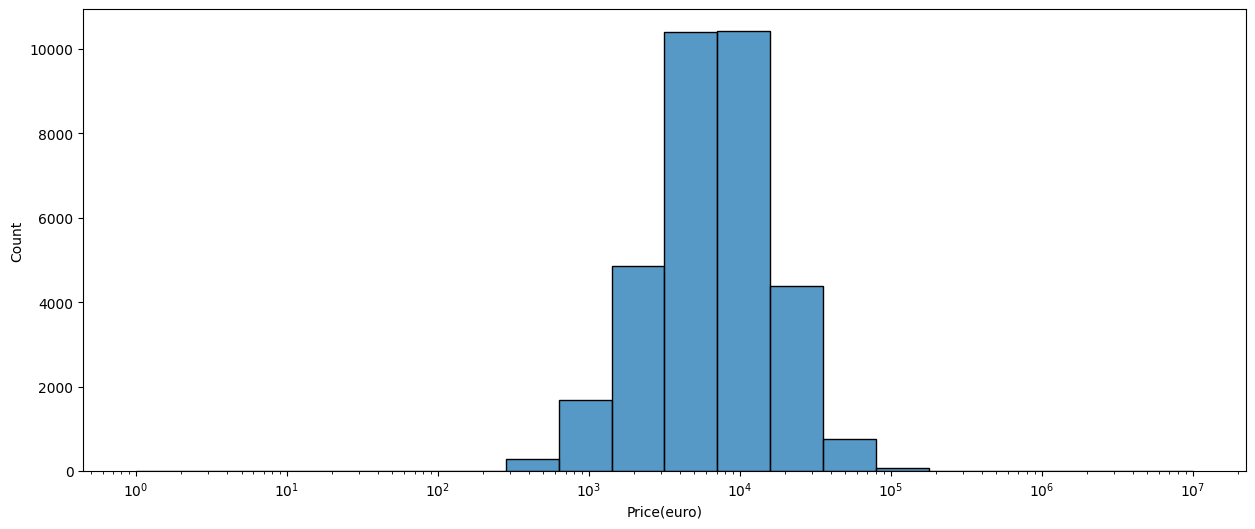

In [21]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Price(euro)', bins = 20, log_scale = True);

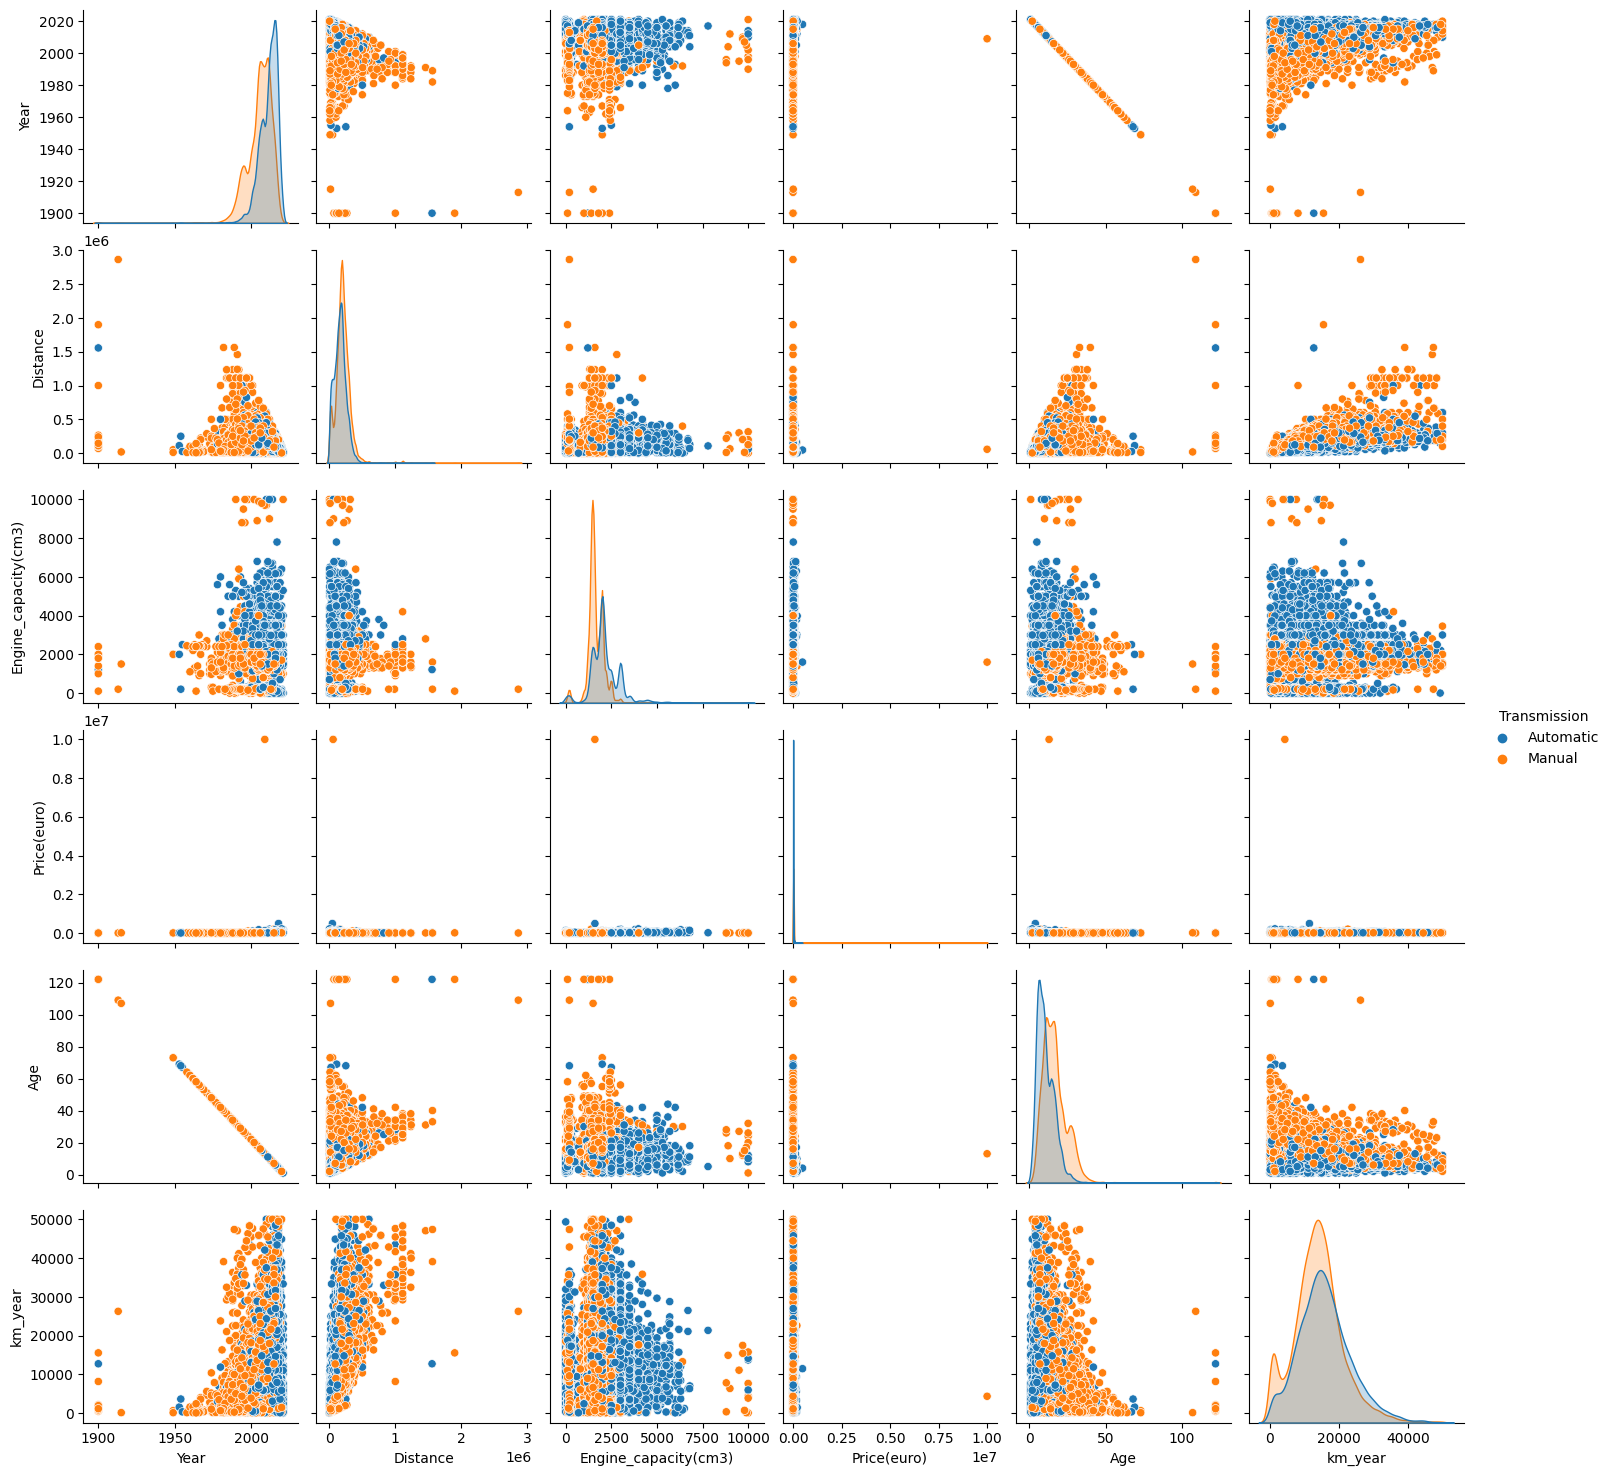

In [22]:
sns.pairplot(data = df, hue ='Transmission')

<Axes: xlabel='Distance', ylabel='Price(euro)'>

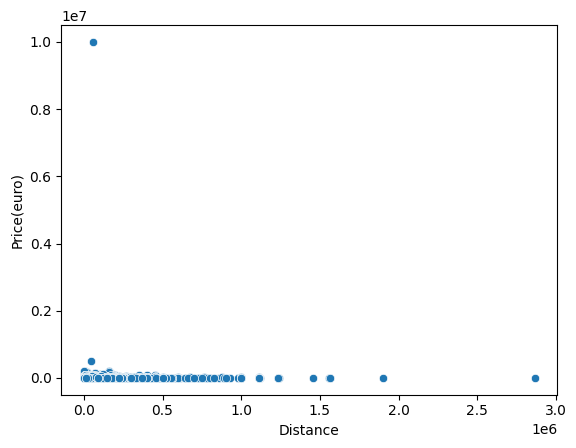

In [23]:
sns.scatterplot(x='Distance', y='Price(euro)', data=df)

Добавляем в модель дополнительные признаки на основе имеющихся.

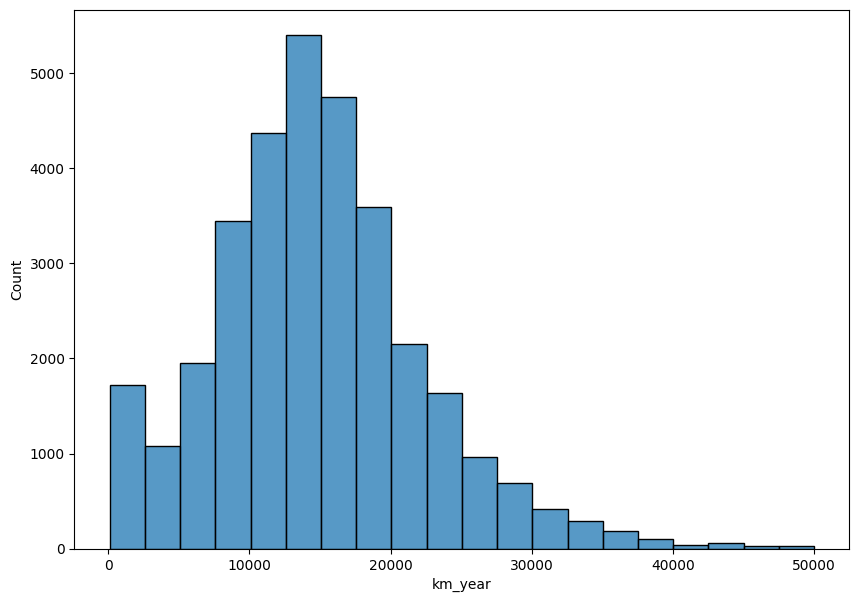

In [24]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)


plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

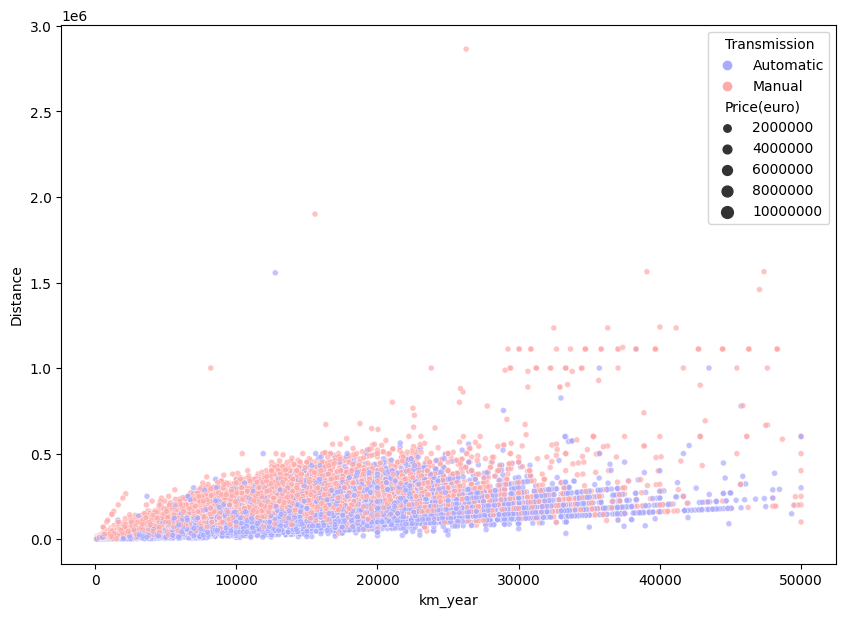

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year", y="Distance",
    hue="Transmission",
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

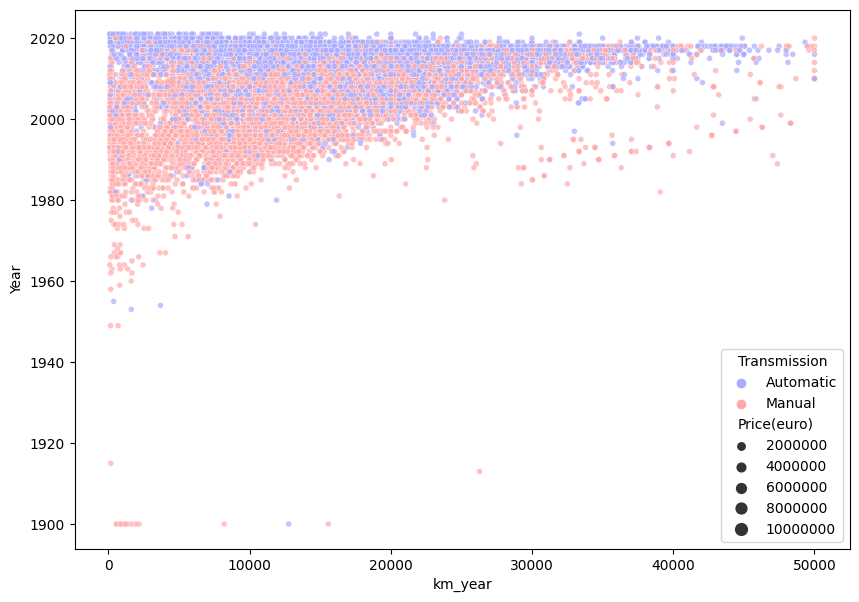

In [26]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="km_year", y="Year",
    hue="Transmission",
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

Посмотрим на корреляцию численных столбцов

In [27]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

<ipython-input-27-3e5ca5e3e7a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)


,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
Year,1.000000,-0.419538,-0.032226,0.092256,-1.000000,0.391493
Distance,-0.419538,1.000000,0.058819,-0.065631,0.419538,0.474601
Engine_capacity(cm3),-0.032226,0.058819,1.000000,0.061300,0.032226,-0.009082
Price(euro),0.092256,-0.065631,0.061300,1.000000,-0.092256,0.014273
Age,-1.000000,0.419538,0.032226,-0.092256,1.000000,-0.391493
km_year,0.391493,0.474601,-0.009082,0.014273,-0.391493,1.000000
